In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import walk
import os
import glob
import tensorflow as tf

## To resize the images by 150*150 

In [53]:
# Define the path to your folder containing images
folder_path = './images'                  # Replace with the path to your folder

# Create a new folder to save the resized images
output_folder = './re_images'             # Replace with the path for saving resized images
os.makedirs(output_folder, exist_ok=True)

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')): 
       # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Resize the image to 150x150
        resized_image = cv2.resize(image, (150, 150))

        # Save the resized image in the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_image)

        print(f"Resized and saved {filename}")



Resized and saved c3.jpeg
Resized and saved d4.jpg
Resized and saved d2.jpg
Resized and saved d1.jpeg
Resized and saved c4.jpg
Resized and saved c5.jpg


## 1. Manually label the images 

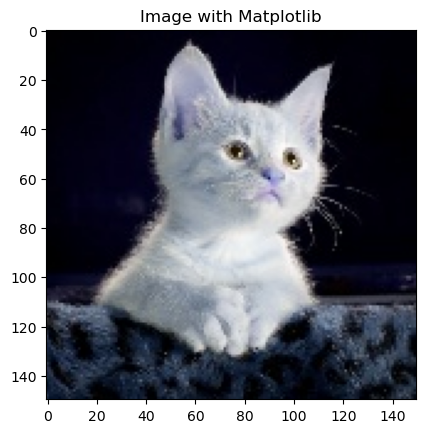

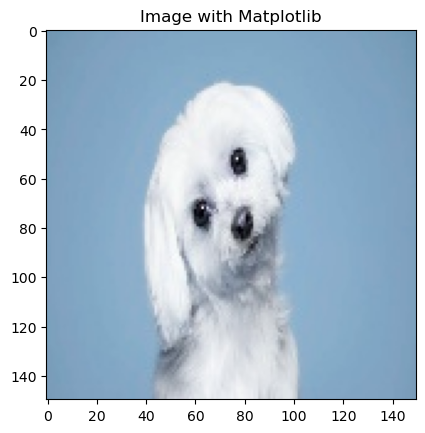

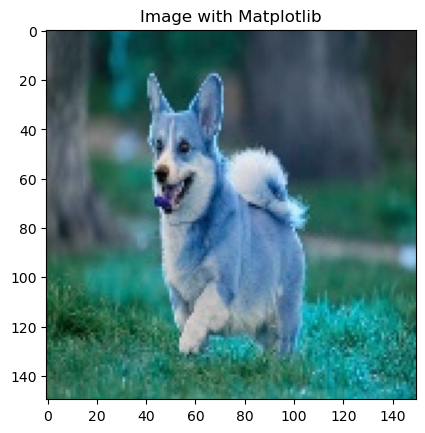

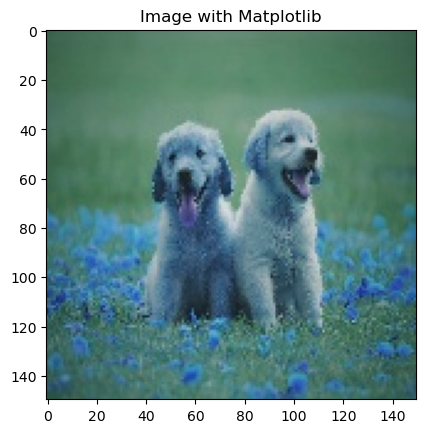

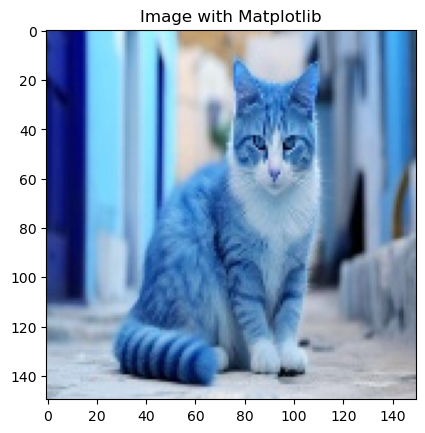

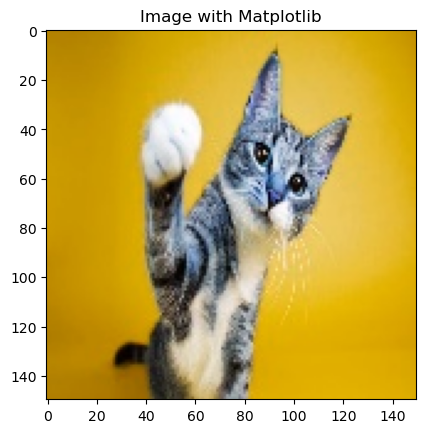

In [54]:
image_dir = './re_images'  #path to the image folder containing images to labe
image_files = os.listdir(image_dir)

labels = []

# Iterate through subfolders if the image folder has any subfolders
for label in os.listdir(image_dir):
    subfolder_path = os.path.join(image_dir, label)
    
    if os.path.isdir(subfolder_path):
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)
            img = cv2.imread(image_path)
            
            if img is None:
                print(f"Failed to load image at {image_path}.")
            else:
                print(f"Image loaded successfully with shape: {img.shape}")
            # Display the image          
            plt.imshow(img)
            plt.title("Image with Matplotlib")
            plt.show()
                
            # Wait for user input and close the image window
            label = input(f"Enter label for {image_file}: ")
            labels.append((image_file, label))
            cv2.destroyAllWindows()
    else:               # if the image folder does not have any subfolders
        for image_file in image_files:
            image_path = os.path.join(image_dir, image_file)
            img = cv2.imread(image_path)

            
#             if img is None:
#                 print(f"Failed to load image at {image_path}.")
#             else:
#                 print(f"Image loaded successfully with shape: {img.shape}")
            # Display the image          
            plt.imshow(img)
            plt.title("Image with Matplotlib")
            plt.show()

            # Wait for user input and close the image window
            label = input(f"Enter label for {image_file}: ")
            labels.append((image_file, label))
    
            cv2.destroyAllWindows()
        break
        
# Save the labels to a file or process them further
with open('image_labels.txt', 'w') as f:
    for image_file, label in labels:
        f.write(f"{image_file}: {label}\n")

#### With this separate text file (image_labels.txt) containing labels, the model can be fed with  the labels for the input images.

## 2. Through subfolders' names, labelling can be interpreted

In [55]:
import os

# Directory containing folders of images
image_dir = './images_folder'
#image_files = os.listdir(image_dir)
labels = []

# Iterate through subfolders
for label in os.listdir(image_dir):
    subfolder_path = os.path.join(image_dir, label)
    
    if os.path.isdir(subfolder_path):
        # Assign label based on folder name
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)
            labels.append((image_path, label))

# Save or use the labels
with open('automatic_image_labels.txt', 'w') as f:
    for image_path, label in labels:
        f.write(f"{image_path}: {label}\n")


In [56]:
labels

[('./images_folder/cat/c3.jpeg', 'cat'),
 ('./images_folder/cat/c4.jpg', 'cat'),
 ('./images_folder/cat/c5.jpg', 'cat'),
 ('./images_folder/dog/d4.jpg', 'dog'),
 ('./images_folder/dog/d2.jpg', 'dog'),
 ('./images_folder/dog/d1.jpeg', 'dog')]

#### Here, you can observe the labels are automatically interpreted through the corresponding folder name.  

## Image manipulation

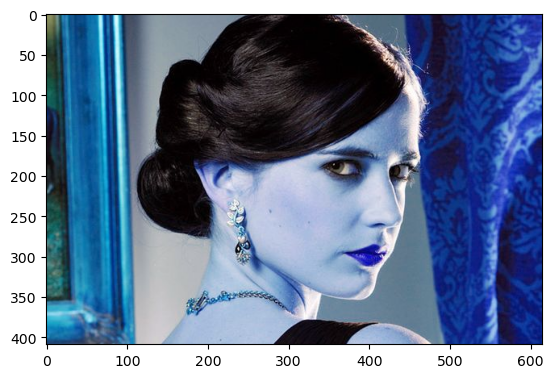

In [62]:
# Read and display Eva image

evaImg = cv2.imread('./Eva.jpg',1)

plt.imshow(evaImg)


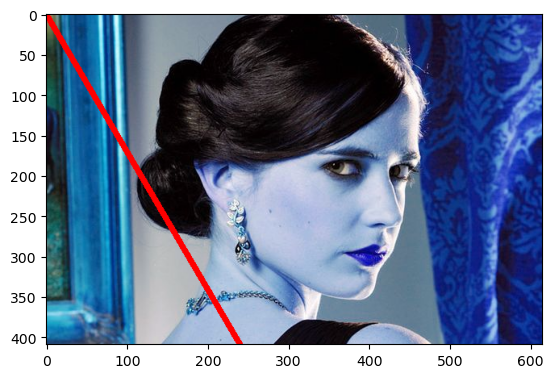

In [63]:
evaImg = cv2.line(evaImg, (0, 0), (300, 511), (255, 0, 0), 5)

plt.imshow(evaImg)

### Image rectangle building

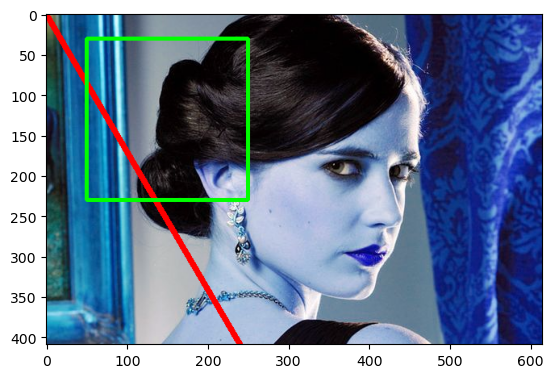

In [64]:
evaImg = cv2.rectangle(evaImg, (50, 30), (250, 230), (0, 255, 0), 3)

plt.imshow(evaImg)

### Drawing a circle

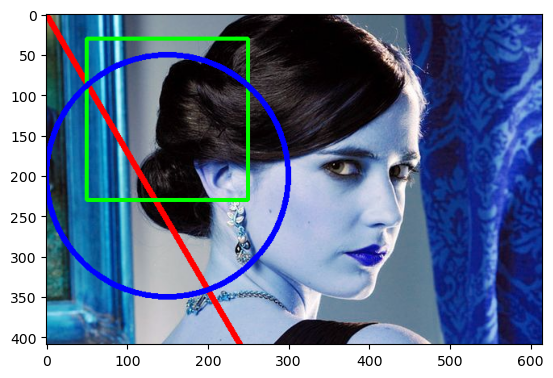

In [65]:
evaImg = cv2.circle(evaImg, (150, 200), 150, (0, 0, 255), 5)
plt.imshow(evaImg)

### Cropping images

In [68]:
import cv2 
 # Load the image 
image = cv2.imread("burano.jpg") 
 # Define the coordinates of the region you want to crop (top left and bottom right) 
top_left = (100, 100) 
bottom_right = (400, 300) 
 # Crop the image 
cropped_image =image[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]] 
 
# Save the cropped image to a file 
cv2.imwrite("cropped_image.jpg", cropped_image) 
 
# Display the cropped image (optional) 
cv2.imshow("Cropped Image", cropped_image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()